# Crops Production data from all over the world

The following dataset is collected from http://www.fao.org/faostat/en/#data/QC 

The data explains the following terms
1. Area: Country
2. Item: specific crop
3. Unit: quantity
 1. Area harvested (ha)
 2. Production (tonnes)
 3. Yield (hg/ha)
4. year: from 1961-2018

#Importing necessary libraries

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#listing out the varioud files in the directory
import os
for entry in os.scandir('.'):
    if entry.is_file():
        print(entry.name)

data.csv
FAO.ipynb
README.md


In [56]:
#importing the data
data = pd.read_csv('data.csv')

In [51]:
#informartion about data, data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51154 entries, 0 to 51153
Data columns (total 62 columns):
Area       51154 non-null object
Item       51154 non-null object
Element    51154 non-null object
Unit       51154 non-null object
1961       34520 non-null float64
1962       34550 non-null float64
1963       34548 non-null float64
1964       34575 non-null float64
1965       34566 non-null float64
1966       34720 non-null float64
1967       34750 non-null float64
1968       34837 non-null float64
1969       34869 non-null float64
1970       34980 non-null float64
1971       35057 non-null float64
1972       35101 non-null float64
1973       35113 non-null float64
1974       35178 non-null float64
1975       35346 non-null float64
1976       35428 non-null float64
1977       35622 non-null float64
1978       35671 non-null float64
1979       35839 non-null float64
1980       36143 non-null float64
1981       36257 non-null float64
1982       36378 non-null float64
1983       

In [57]:
#first 5 rows of the data
data.head()

,Area,Item,Element,Unit,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"Almonds, with shell",Area harvested,ha,NaN,NaN,NaN,NaN,NaN,NaN,...,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,Afghanistan,"Almonds, with shell",Yield,hg/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,Afghanistan,"Almonds, with shell",Production,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,ha,NaN,NaN,NaN,NaN,NaN,NaN,...,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,hg/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0


In [53]:
#obtaining the number of null values for each column
null_values = data.isna().sum()
null_values

Area           0
Item           0
Element        0
Unit           0
1961       16634
1962       16604
1963       16606
1964       16579
1965       16588
1966       16434
1967       16404
1968       16317
1969       16285
1970       16174
1971       16097
1972       16053
1973       16041
1974       15976
1975       15808
1976       15726
1977       15532
1978       15483
1979       15315
1980       15011
1981       14897
1982       14776
1983       14692
1984       14592
1985       12832
1986       12633
           ...  
1989       12092
1990       10602
1991       10372
1992        6850
1993        6631
1994        6341
1995        6158
1996        6061
1997        5856
1998        5686
1999        5434
2000        5027
2001        4932
2002        4869
2003        4564
2004        4361
2005        4293
2006        4106
2007        4030
2008        3992
2009        3977
2010        3893
2011        3877
2012        3789
2013        3784
2014        3752
2015        5529
2016        55

In [54]:
#percentage of null values for each variable
percentage_null_vales = (null_values/data.shape[0])*100
print(percentage_null_vales)

Area        0.000000
Item        0.000000
Element     0.000000
Unit        0.000000
1961       32.517496
1962       32.458850
1963       32.462760
1964       32.409978
1965       32.427572
1966       32.126520
1967       32.067873
1968       31.897799
1969       31.835243
1970       31.618251
1971       31.467725
1972       31.381710
1973       31.358252
1974       31.231184
1975       30.902764
1976       30.742464
1977       30.363217
1978       30.267428
1979       29.939008
1980       29.344724
1981       29.121867
1982       28.885327
1983       28.721117
1984       28.525628
1985       25.085037
1986       24.696016
             ...    
1989       23.638425
1990       20.725652
1991       20.276029
1992       13.390937
1993       12.962818
1994       12.395903
1995       12.038159
1996       11.848536
1997       11.447785
1998       11.115455
1999       10.622825
2000        9.827188
2001        9.641475
2002        9.518317
2003        8.922078
2004        8.525238
2005        8

In [44]:
#checking for the minimum and maximum percentage of null values
print("maximum null values %: {}".format(max(percentage_null_vales)))
print("maximum null values %: {}".format(min(percentage_null_vales[4: 64])))

maximum null values %: 32.517496187981386
maximum null values %: 7.334714782812683


<BarContainer object of 62 artists>

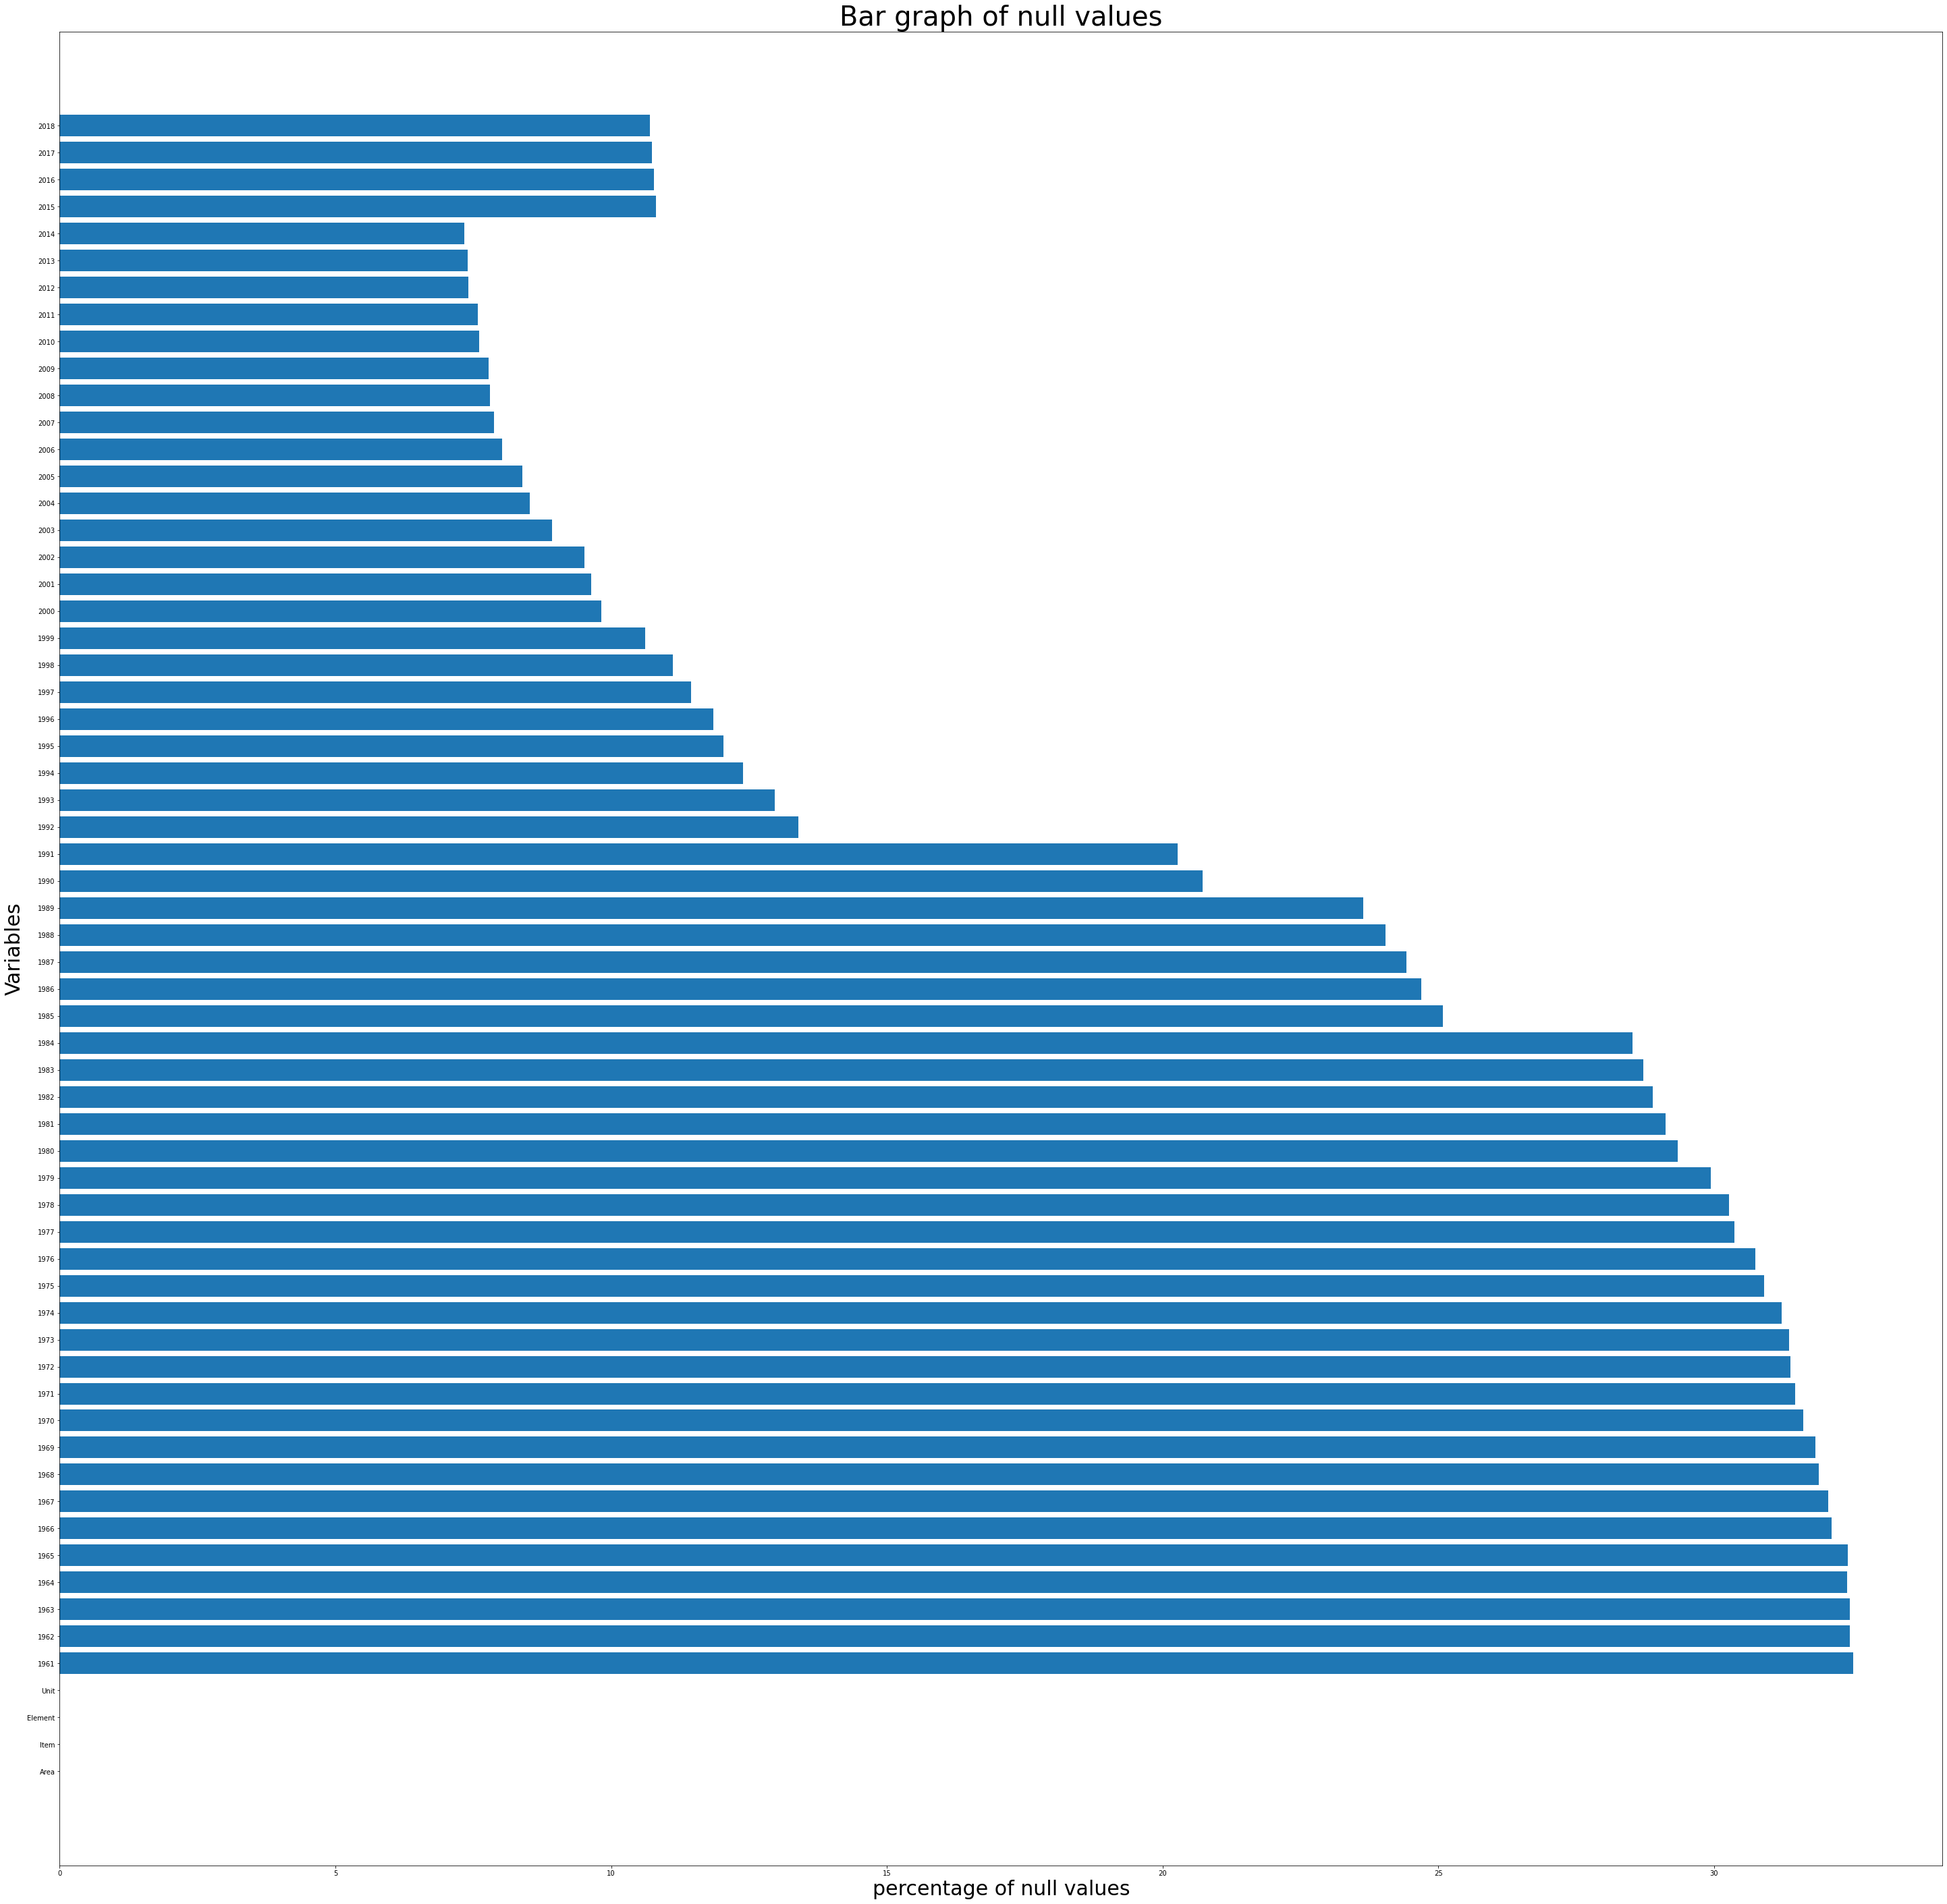

In [45]:
#exploratory graph for variavles vs percentage_null_vales
fig = plt.figure(1, figsize=(50,50))
plt.title("Bar graph of null values", fontsize=40)
plt.xlabel('percentage of null values', fontsize=30)
plt.ylabel('Variables', fontsize=30)
plt.barh(data.columns, percentage_null_vales)

In [76]:
#Unique crops grwon across the world
data['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Cotton lint',
       'Cottonseed', 'Figs', 'Fruit, citrus nes', 'Fruit, fresh nes',
       'Fruit, stone nes', 'Grapes', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Millet', 'Nuts nes', 'Olives',
       'Onions, dry', 'Oranges', 'Peaches and nectarines', 'Pears',
       'Pistachios', 'Plums and sloes', 'Potatoes', 'Pulses nes',
       'Rice, paddy', 'Seed cotton', 'Sesame seed', 'Spices nes',
       'Sugar beet', 'Sugar cane', 'Sunflower seed',
       'Vegetables, fresh nes', 'Walnuts, with shell', 'Watermelons',
       'Wheat', 'Cereals (Rice Milled Eqv)', 'Cereals, Total',
       'Citrus Fruit, Total', 'Coarse Grain, Total',
       'Fibre Crops Primary', 'Fruit Primary', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Treenuts, Total',
       'Vegetables Primary', 'Be

In [153]:
#filtreing the data with major crops like Rice-paddy, Wheat, Soybeans, Sugarcane, Maize. 
data_filter=data.loc[data['Item'].isin(['Rice, paddy', 'Wheat', 'Soybeans', 'Sugarcane', 'Maize'])]
data_filter.head(20)

,Area,Item,Element,Unit,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,Afghanistan,Maize,Area harvested,ha,500000.0,500000.0,500000.0,505000.0,500000.0,500000.0,...,140000.0,183000.0,183000.0,141000.0,142000.0,127000.0,147273.0,151900.0,134225.0,72433.0
39,Afghanistan,Maize,Yield,hg/ha,14000.0,14000.0,14260.0,14257.0,14400.0,14400.0,...,21429.0,16448.0,16400.0,21986.0,21972.0,24882.0,21457.0,20517.0,12957.0,14727.0
40,Afghanistan,Maize,Production,tonnes,700000.0,700000.0,713000.0,720000.0,720000.0,720000.0,...,300000.0,301000.0,300120.0,310000.0,312000.0,316000.0,316000.0,311646.0,173912.0,106670.0
77,Afghanistan,"Rice, paddy",Area harvested,ha,210000.0,210000.0,210000.0,220000.0,220000.0,222000.0,...,200000.0,208000.0,210000.0,205000.0,205000.0,220000.0,164000.0,119000.0,109452.0,117539.0
78,Afghanistan,"Rice, paddy",Yield,hg/ha,15190.0,15190.0,15190.0,17273.0,17273.0,15180.0,...,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0,25000.0,29963.0,30919.0,29963.0
79,Afghanistan,"Rice, paddy",Production,tonnes,319000.0,319000.0,319000.0,380000.0,380000.0,337000.0,...,645000.0,672000.0,672000.0,500000.0,512094.0,537000.0,410000.0,356565.0,338420.0,352177.0
107,Afghanistan,Wheat,Area harvested,ha,2230000.0,2341000.0,2341000.0,2345000.0,2347000.0,2346000.0,...,2575000.0,2354000.0,2232000.0,2512000.0,2552922.0,2653746.0,2128104.0,2300210.0,2104377.0,1635000.0
108,Afghanistan,Wheat,Yield,hg/ha,10220.0,9735.0,8317.0,9510.0,9723.0,8666.0,...,19666.0,19252.0,15179.0,20104.0,20248.0,20237.0,21959.0,19803.0,20342.0,22100.0
109,Afghanistan,Wheat,Production,tonnes,2279000.0,2279000.0,1947000.0,2230000.0,2282000.0,2033000.0,...,5064000.0,4532000.0,3388000.0,5050000.0,5169235.0,5370259.0,4673040.0,4555110.0,4280776.0,3613300.0
228,Albania,Maize,Area harvested,ha,161516.0,135383.0,161138.0,145457.0,157631.0,146598.0,...,47600.0,54200.0,61200.0,53500.0,53500.0,55000.0,54600.0,58528.0,58060.0,54115.0


In [154]:
#obtaining the number of null values for each column
null_values_filter = data_filter.isna().sum()
#percentage of null values for each variable
percentage_null_vales_filter = (null_values_filter/data_filter.shape[0])*100
print(percentage_null_vales_filter)

Area        0.000000
Item        0.000000
Element     0.000000
Unit        0.000000
1961       24.363992
1962       24.412916
1963       24.412916
1964       24.510763
1965       24.510763
1966       24.168297
1967       23.923679
1968       23.679061
1969       23.385519
1970       22.749511
1971       22.455969
1972       22.015656
1973       21.428571
1974       21.135029
1975       20.694716
1976       20.254403
1977       20.107632
1978       20.401174
1979       20.401174
1980       20.156556
1981       20.401174
1982       20.254403
1983       19.960861
1984       19.960861
1985       19.569472
1986       18.982387
             ...    
1989       18.150685
1990       16.878669
1991       17.025440
1992        8.806262
1993        8.365949
1994        8.365949
1995        8.072407
1996        8.219178
1997        8.268102
1998        8.414873
1999        8.414873
2000        7.974560
2001        7.827789
2002        7.925636
2003        7.681018
2004        7.485323
2005        7

In [155]:
#dropping 'Unit' column
data_filter = data_filter.drop(['Unit'], axis=1)
data_filter.head()

,Area,Item,Element,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,Afghanistan,Maize,Area harvested,500000.0,500000.0,500000.0,505000.0,500000.0,500000.0,543000.0,...,140000.0,183000.0,183000.0,141000.0,142000.0,127000.0,147273.0,151900.0,134225.0,72433.0
39,Afghanistan,Maize,Yield,14000.0,14000.0,14260.0,14257.0,14400.0,14400.0,14144.0,...,21429.0,16448.0,16400.0,21986.0,21972.0,24882.0,21457.0,20517.0,12957.0,14727.0
40,Afghanistan,Maize,Production,700000.0,700000.0,713000.0,720000.0,720000.0,720000.0,768000.0,...,300000.0,301000.0,300120.0,310000.0,312000.0,316000.0,316000.0,311646.0,173912.0,106670.0
77,Afghanistan,"Rice, paddy",Area harvested,210000.0,210000.0,210000.0,220000.0,220000.0,222000.0,206000.0,...,200000.0,208000.0,210000.0,205000.0,205000.0,220000.0,164000.0,119000.0,109452.0,117539.0
78,Afghanistan,"Rice, paddy",Yield,15190.0,15190.0,15190.0,17273.0,17273.0,15180.0,19223.0,...,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0,25000.0,29963.0,30919.0,29963.0


In [165]:
data_year = data_filter[data_filter.columns[3:61]]
data_year.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,500000.0,500000.0,500000.0,505000.0,500000.0,500000.0,543000.0,453000.0,457000.0,452000.0,...,140000.0,183000.0,183000.0,141000.0,142000.0,127000.0,147273.0,151900.0,134225.0,72433.0
39,14000.0,14000.0,14260.0,14257.0,14400.0,14400.0,14144.0,17064.0,17177.0,14757.0,...,21429.0,16448.0,16400.0,21986.0,21972.0,24882.0,21457.0,20517.0,12957.0,14727.0
40,700000.0,700000.0,713000.0,720000.0,720000.0,720000.0,768000.0,773000.0,785000.0,667000.0,...,300000.0,301000.0,300120.0,310000.0,312000.0,316000.0,316000.0,311646.0,173912.0,106670.0
77,210000.0,210000.0,210000.0,220000.0,220000.0,222000.0,206000.0,206000.0,206000.0,202000.0,...,200000.0,208000.0,210000.0,205000.0,205000.0,220000.0,164000.0,119000.0,109452.0,117539.0
78,15190.0,15190.0,15190.0,17273.0,17273.0,15180.0,19223.0,19515.0,19757.0,18119.0,...,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0,25000.0,29963.0,30919.0,29963.0


In [168]:
data_fill = data_year.interpolate(method='time')
data_fill.head(20)

ValueError: time-weighted interpolation only works on Series or DataFrames with a DatetimeIndex